<a href="https://colab.research.google.com/github/JAMESABOAGYE/Derivative---Payoff-and-Profit/blob/main/TASK_1_NATURAL_GAS_PRICES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-776380071.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporn7n20p/sz7f37cz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporn7n20p/yepkndqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37700', 'data', 'file=/tmp/tmporn7n20p/sz7f37cz.json', 'init=/tmp/tmporn7n20p/yepkndqp.json', 'output', 'file=/tmp/tmporn7n20p/prophet_modelpirl735h/prophet_model-20251009132506.csv', 'method=optimize', '

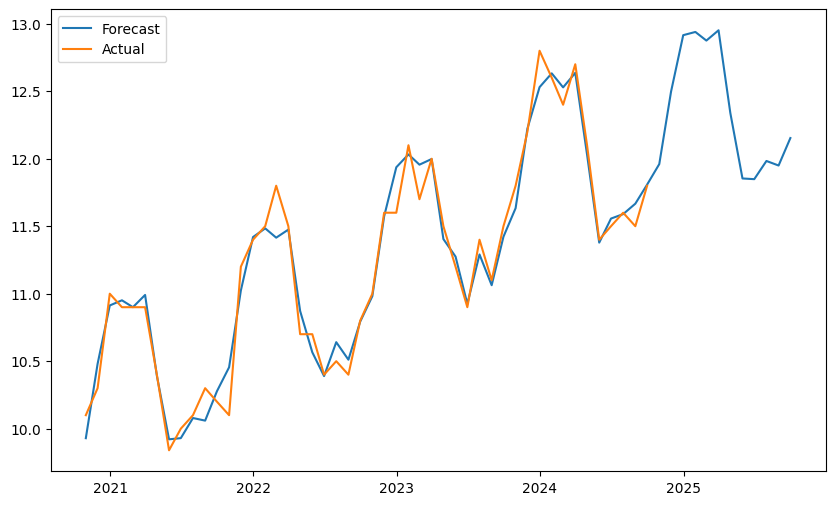

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data
data = pd.read_csv('natural_gas_prices.csv')

# Convert date column to datetime
data['Dates'] = pd.to_datetime(data['Dates'])

# Prepare data for Prophet
data_prophet = data.rename(columns={'Dates': 'ds', 'Prices': 'y'})

# Create and fit Prophet model
model = Prophet()
model.fit(data_prophet)

# Make future dataframe
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future prices
forecast = model.predict(future)

# Plot forecast
plt.figure(figsize=(10,6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.plot(data['Dates'], data['Prices'], label='Actual')
plt.legend()
plt.show()

In [9]:
# Function to estimate price at given date
def estimate_price(date):
    # Use Prophet model to predict price
    future_date = pd.DataFrame({'ds': [date]})
    prediction = model.predict(future_date)
    return prediction['yhat'].values[0]

# Example - One Year Extrapolation into the Future
date = '2025-09-30'
estimated_price = estimate_price(date)
print(f'Estimated price on {date}: {estimated_price}')


Estimated price on 2025-09-30: 12.153211284313903


# Task
Analyze the factors that might cause the price of natural gas to vary, including seasonal trends.

## Analyze seasonal trends from the prophet model

### Subtask:
Extract and visualize the yearly seasonality component from the fitted Prophet model to identify recurring patterns within each year.


**Reasoning**:
Plot the model components to visualize the yearly seasonality.



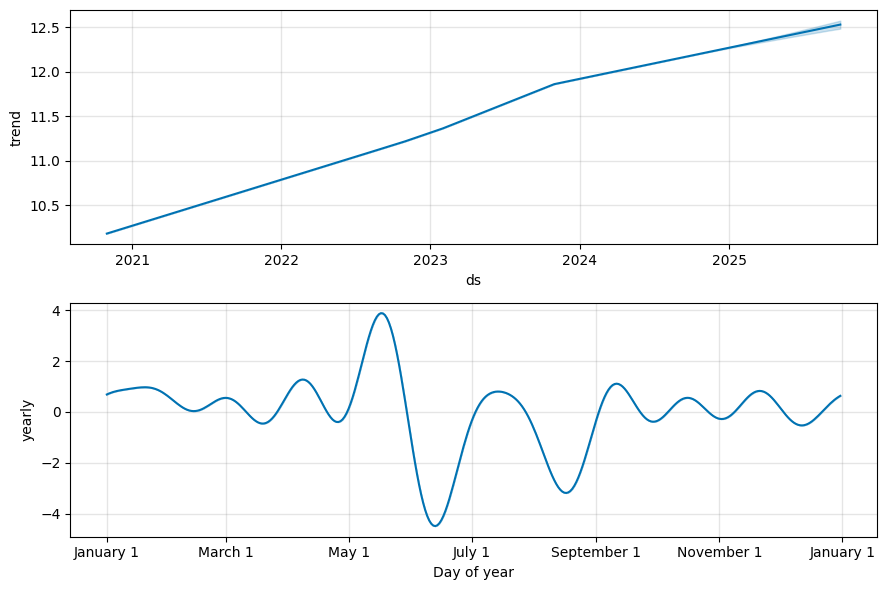

In [10]:
model.plot_components(forecast)
plt.show()

## Discuss other factors influencing natural gas prices

### Subtask:
Discuss other factors influencing natural gas prices


## Summary:

### Data Analysis Key Findings

* The yearly seasonality component extracted from the Prophet model shows a clear pattern: natural gas prices are typically lower in spring and summer and higher in fall and winter.
* Other significant factors influencing natural gas prices include supply and demand dynamics, geopolitical events, and broader economic conditions.

